# SEOUL_BIKE_REGGRESION_PROJECT 

# problem statement

# currently rental bikes are introducted in many urban cities for the enchancement of mobility confort .it is important to make the rental bike avialable and accssible to public at right time as it lessen the waiting time

# business understanding
# predict the bike count required at each hour to rental using its multiple feature like weather condition ,time,date,holidays,like so on


import important libraries

# Data summary

# this datasets cantain 8760 rows and 14 columns
# there are three categorical features Seasons,Holidays,Functioning Day
# one Datetime columns Date
# we havr some numerical types such as temp,wind temp,humidity, and so on
# there are no missing value
# there are no duplicate value
# there are no null value
# the depented variable is rented bike count which we need to make prediction on
# the datasets shows hourly rented data for one year (365 days )


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets read  the data
df=pd.read_csv(r"C:\Users\sajal\Downloads\SeoulBikeData (2).csv",encoding= 'unicode_escape')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
# LETS CHECK SHAPE 
df.shape

(8760, 14)

In [6]:
# LETS CHECK DATATYPES
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [7]:
# LETS CONVERT DATE INTO DAY,MONTH,YEAR FORMAT
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [8]:
# LETS COUNT THE VALUE OF DATE
df.value_counts('Date')

Date
2017-12-01    24
2018-08-09    24
2018-08-07    24
2018-08-06    24
2018-08-05    24
              ..
2018-03-31    24
2018-03-30    24
2018-03-29    24
2018-03-28    24
2018-11-30    24
Name: count, Length: 365, dtype: int64

In [9]:
df['weekdays']=df['Date'].dt.day_name()
df['days']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [10]:
df.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays,days,month,year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017


In [11]:
df.drop('Date',axis=1,inplace=True)

In [12]:
# LETS SEE COLUMNS NAMES
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'weekdays', 'days', 'month', 'year'],
      dtype='object')

In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  weekdays                   8760 non-null   objec

In [14]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),days,month,year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,15.720548,6.526027,2017.915068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,8.796749,3.448048,0.278796
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,8.000000,4.000000,2018.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,16.000000,7.000000,2018.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,23.000000,10.000000,2018.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,31.000000,12.000000,2018.000000


In [15]:
df.describe(include=['object'])

,Seasons,Holiday,Functioning Day,weekdays
count,8760,8760,8760,8760
unique,4,2,2,7
top,Spring,No Holiday,Yes,Friday
freq,2208,8328,8465,1272


In [16]:
df.describe(include='all')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekdays,days,month,year
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760,8760,8760.000000,8760.000000,8760.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,7,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes,Friday,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465,1272,NaN,NaN,NaN
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN,NaN,15.720548,6.526027,2017.915068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN,NaN,8.796749,3.448048,0.278796
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,2017.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,4.000000,2018.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,16.000000,7.000000,2018.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN,NaN,23.000000,10.000000,2018.000000


In [17]:
# LETS CHECK NULL VALUE
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
weekdays                     0
days                         0
month                        0
year                         0
dtype: int64

In [18]:
cat_df = df.select_dtypes(include=['object'])

num_df = df.select_dtypes(include=['float64','int64'])

In [19]:
cat_df

,Seasons,Holiday,Functioning Day,weekdays
0,Winter,No Holiday,Yes,Friday
1,Winter,No Holiday,Yes,Friday
2,Winter,No Holiday,Yes,Friday
3,Winter,No Holiday,Yes,Friday
4,Winter,No Holiday,Yes,Friday
...,...,...,...,...
8755,Autumn,No Holiday,Yes,Friday
8756,Autumn,No Holiday,Yes,Friday
8757,Autumn,No Holiday,Yes,Friday
8758,Autumn,No Holiday,Yes,Friday


In [20]:
# LETS CONVERT CATGORICAL TO NUMERICAL USING LABELENCODER

In [21]:
from sklearn.preprocessing import LabelEncoder


In [22]:
le = LabelEncoder()

In [23]:
le.fit_transform(cat_df['Seasons'])

array([3, 3, 3, ..., 0, 0, 0])

In [24]:
le.fit_transform(cat_df['Holiday'])

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
le.fit_transform(cat_df['Functioning Day'])

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
le.fit_transform(cat_df['weekdays'])

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
for col in cat_df:
    cat_df[col] = le.fit_transform(cat_df[col])

In [28]:
cat_df

,Seasons,Holiday,Functioning Day,weekdays
0,3,1,1,0
1,3,1,1,0
2,3,1,1,0
3,3,1,1,0
4,3,1,1,0
...,...,...,...,...
8755,0,1,1,0
8756,0,1,1,0
8757,0,1,1,0
8758,0,1,1,0


In [29]:
final_df=pd.concat([cat_df,num_df],axis=1)

In [30]:
# LETS SEE THEH SKEWNESS OF NUMERICAL DATA

In [31]:
from scipy.stats import skew

Rented Bike Count
1.1532306631480034


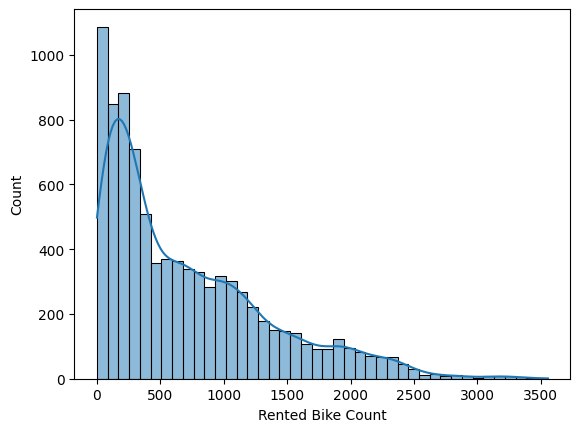

Hour
0.0


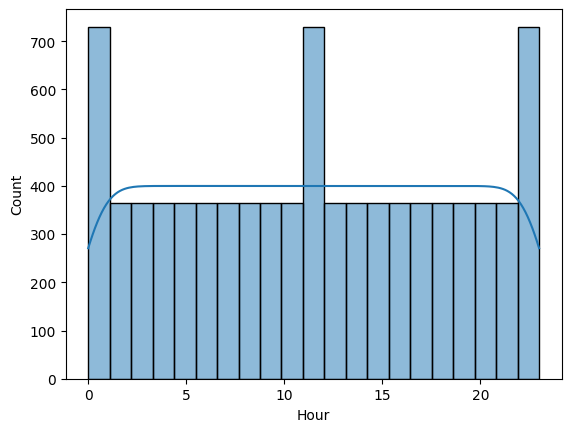

Temperature(°C)
-0.19829157303281608


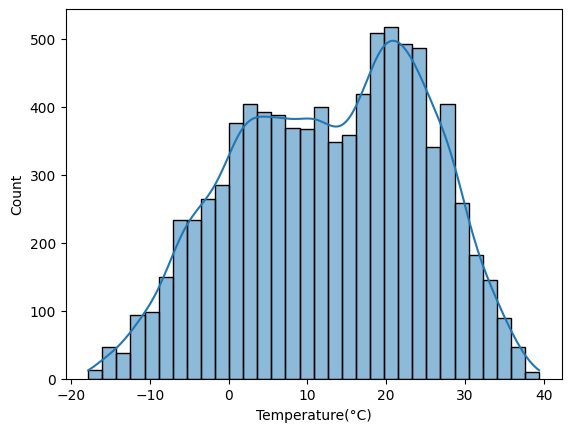

Humidity(%)
0.059568770212928474


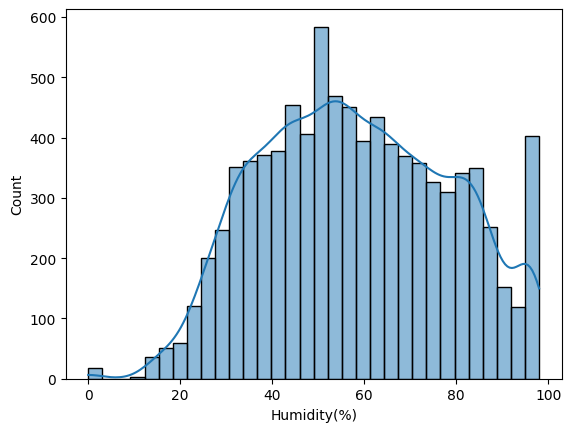

Wind speed (m/s)
0.8908022300197548


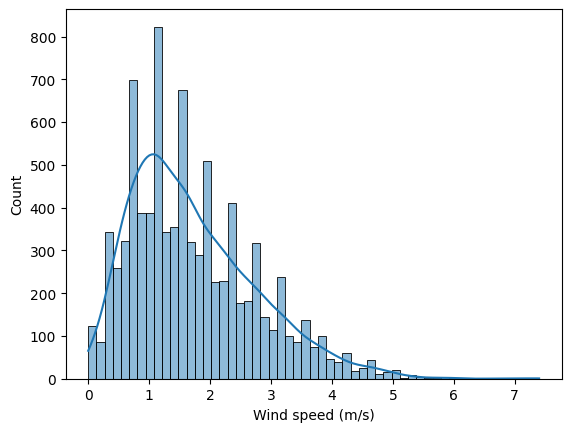

Visibility (10m)
-0.7016662743215496


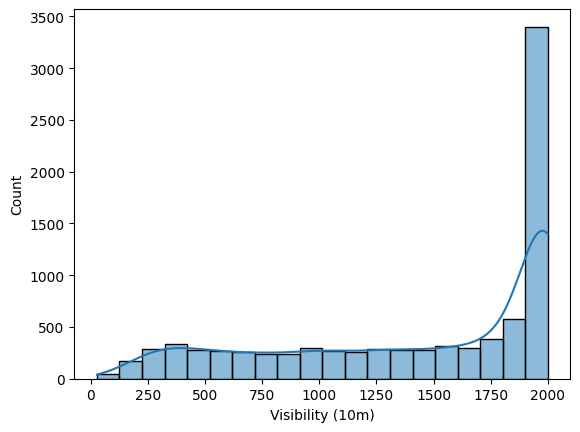

Dew point temperature(°C)
-0.36723554310224116


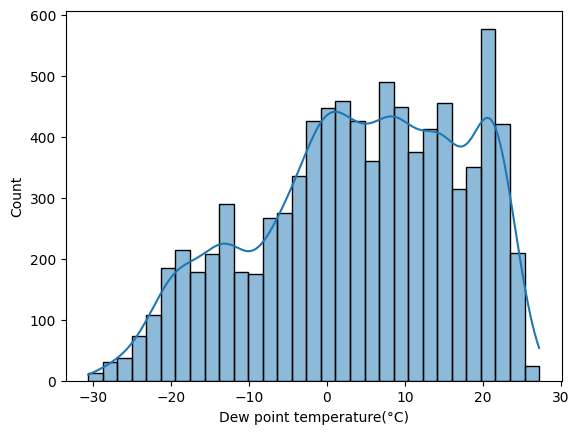

Solar Radiation (MJ/m2)
1.5037821640619484


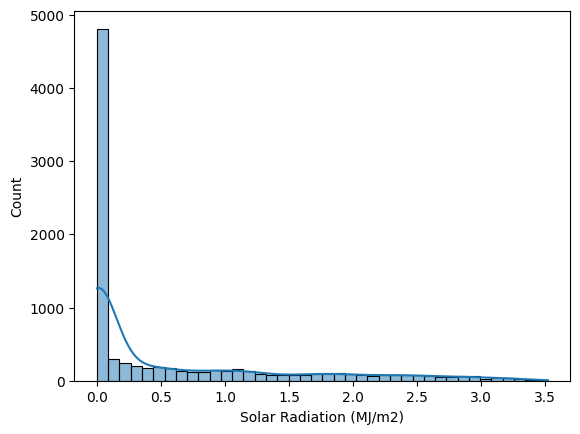

Rainfall(mm)
14.530743557004502


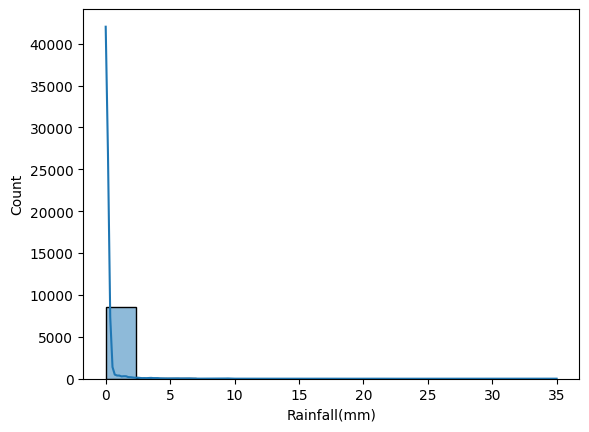

Snowfall (cm)
8.439355370132445


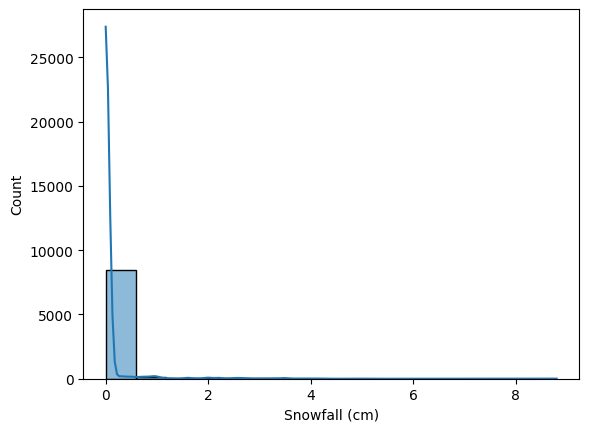

In [32]:
for col in num_df:
    print(col)
    print(skew(num_df[col]))

    plt.figure()
    sns.histplot(num_df[col], kde=True)
    plt.show()

In [33]:
df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


In [34]:
df.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


Text(0.5, 1.0, 'Heatmap')

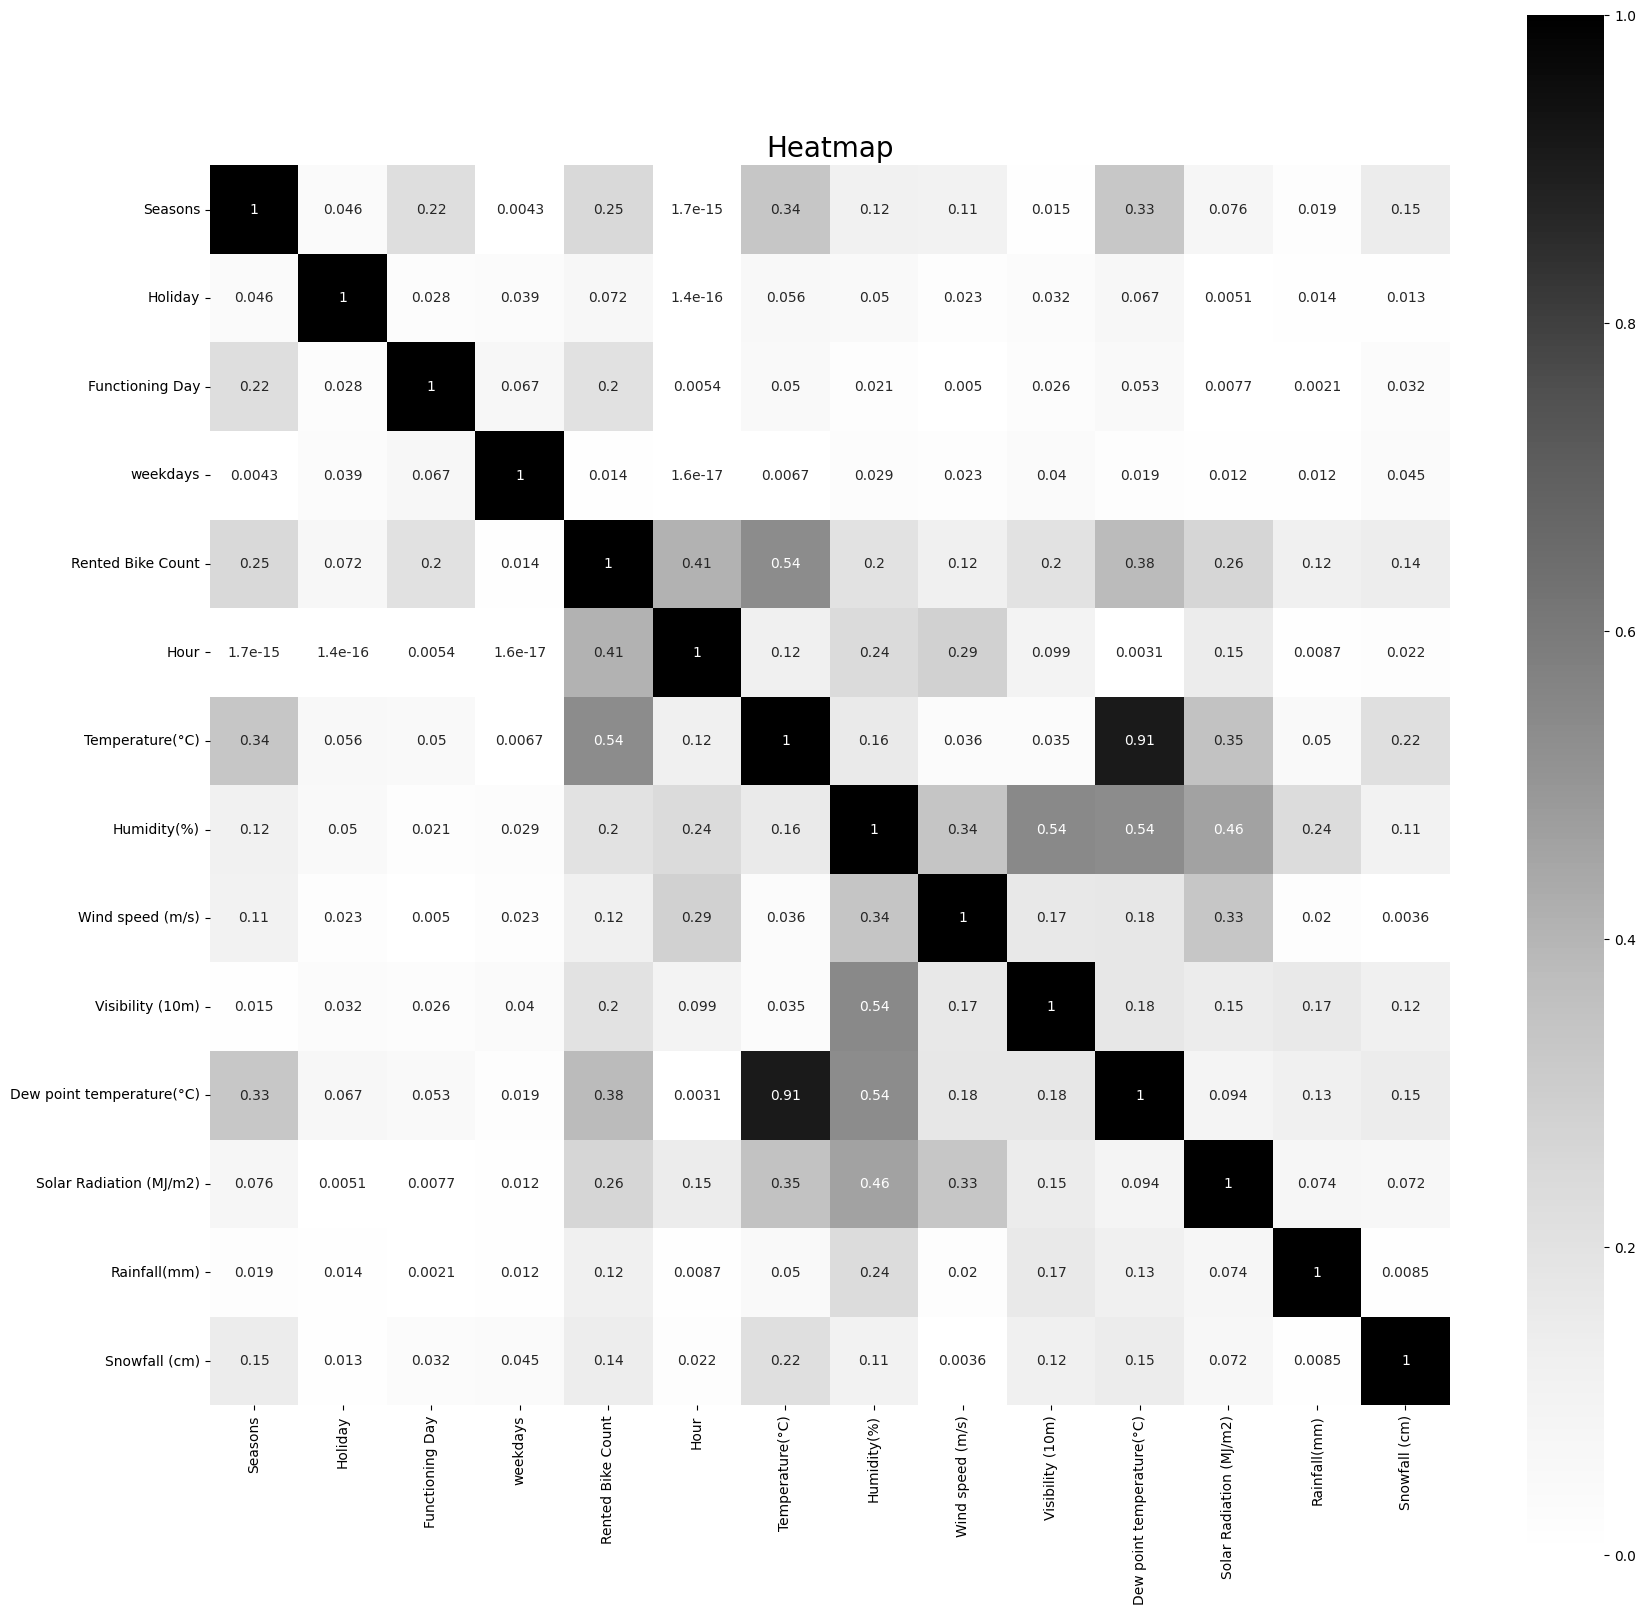

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(final_df.corr()),annot=True, cmap='Greys',square=True)
plt.title('Heatmap',fontsize=20)

In [36]:
final_df=final_df.drop("Dew point temperature(°C)",axis=1,inplace=True)


In [37]:
final_df

In [40]:
df['Rainfall_log'] = np.log1p(df['Rainfall(mm)'])
df['Snowfall_log'] = np.log1p(df['Snowfall (cm)'])

In [41]:
df['Rainfall'] = np.sqrt(df['Rainfall(mm)'])
df['Snowfall'] = np.sqrt(df['Snowfall (cm)'])

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

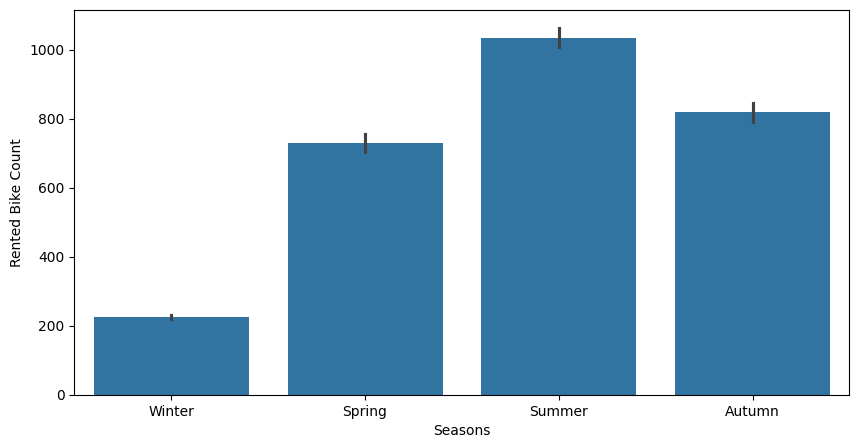

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x='Seasons',y='Rented Bike Count',data=df)

<Axes: xlabel='month', ylabel='Rented Bike Count'>

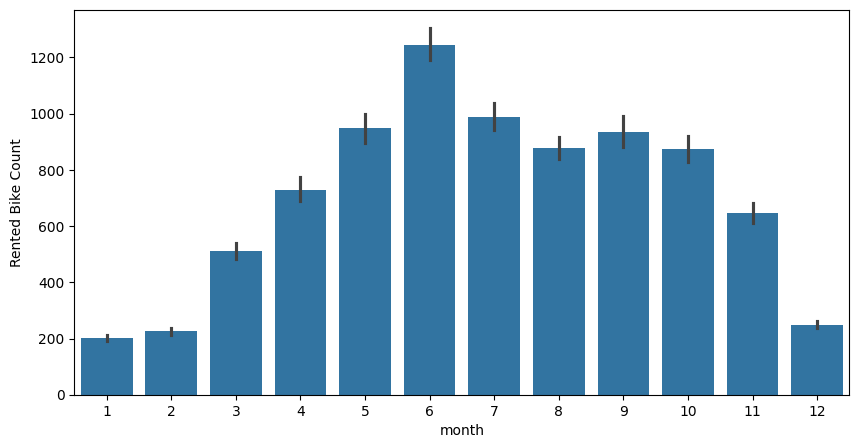

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='Rented Bike Count',data=df)

<Axes: xlabel='days', ylabel='Rented Bike Count'>

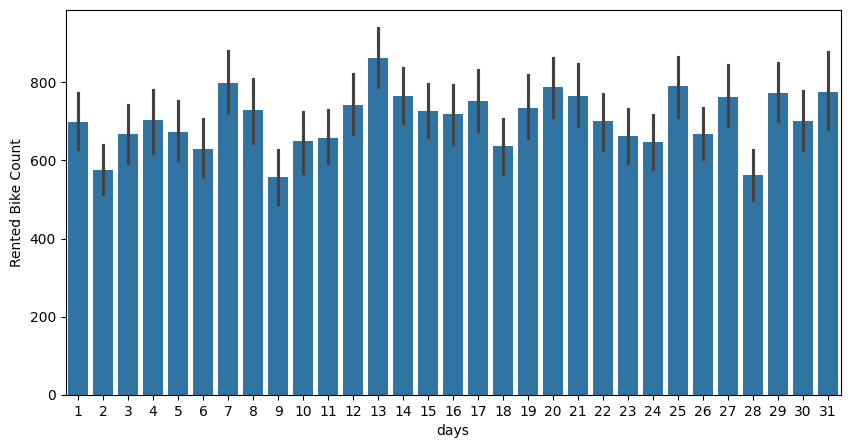

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x='days',y='Rented Bike Count',data=df)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

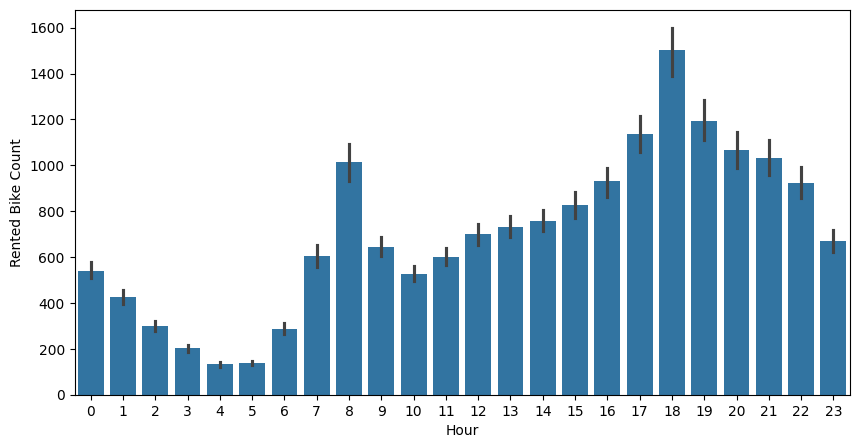

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hour',y='Rented Bike Count',data=df)

<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

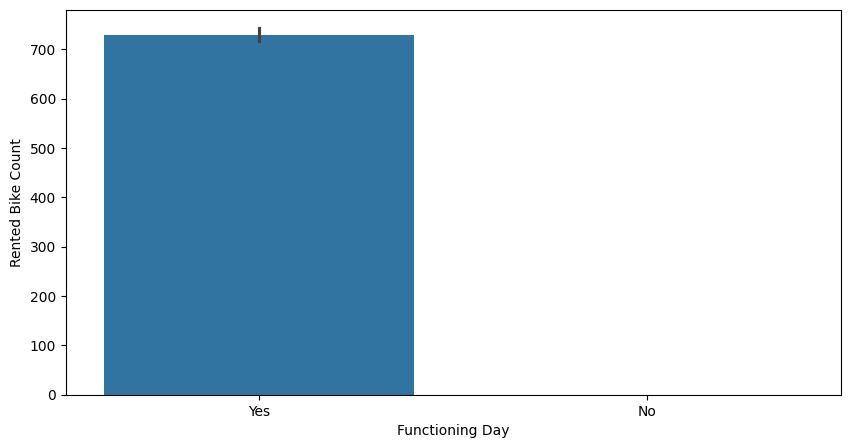

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=df)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

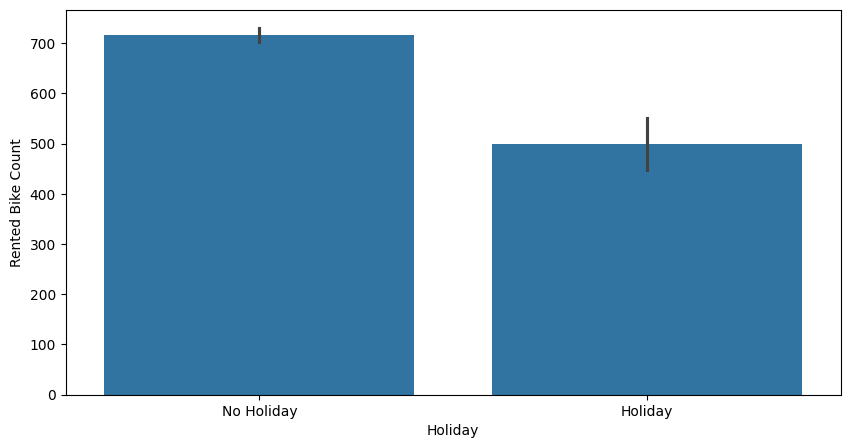

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x='Holiday',y='Rented Bike Count',data=df)

In [48]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
final_data=pd.concat([cat_df,num_df],axis=1)
final_data

,Seasons,Holiday,Functioning Day,weekdays,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,3,1,1,0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,3,1,1,0,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,3,1,1,0,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,1,1,0,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,3,1,1,0,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0,1,1,0,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,0,1,1,0,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,0,1,1,0,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,0,1,1,0,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [50]:
# LETS DO SCALING USING STANDARDSCALER AND MINMAXSCALER

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
st=StandardScaler()

In [53]:
transformed_data = st.fit_transform(final_data)

In [54]:
new_df=pd.DataFrame(transformed_data ,columns=list(final_data.columns))

In [55]:
new_df

,Seasons,Holiday,Functioning Day,weekdays,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,1.349771,0.227757,0.18668,-1.493348,-0.698650,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
1,1.349771,0.227757,0.18668,-1.493348,-0.776175,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
2,1.349771,0.227757,0.18668,-1.493348,-0.824240,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891
3,1.349771,0.227757,0.18668,-1.493348,-0.926571,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891
4,1.349771,0.227757,0.18668,-1.493348,-0.971535,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-1.342395,0.227757,0.18668,-1.493348,0.462661,1.083473,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,-0.171891
8756,-1.342395,0.227757,0.18668,-1.493348,0.092095,1.227936,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,-0.171891
8757,-1.342395,0.227757,0.18668,-1.493348,-0.016438,1.372399,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,-0.171891
8758,-1.342395,0.227757,0.18668,-1.493348,0.011470,1.516862,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,-0.171891


In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
ms=MinMaxScaler()

In [58]:
transformed_data = ms.fit_transform(final_data)

In [59]:
new_df=pd.DataFrame(transformed_data ,columns=list(final_data.columns))

In [60]:
new_df

,Seasons,Holiday,Functioning Day,weekdays,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,1.0,1.0,1.0,0.0,0.071429,0.000000,0.220280,0.377551,0.297297,1.000000,0.224913,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.057368,0.043478,0.215035,0.387755,0.108108,1.000000,0.224913,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.048650,0.086957,0.206294,0.397959,0.135135,1.000000,0.223183,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.030090,0.130435,0.202797,0.408163,0.121622,1.000000,0.224913,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.021935,0.173913,0.206294,0.367347,0.310811,1.000000,0.207612,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,1.0,1.0,0.0,0.282058,0.826087,0.384615,0.346939,0.351351,0.946275,0.351211,0.0,0.0,0.0
8756,0.0,1.0,1.0,0.0,0.214848,0.869565,0.370629,0.377551,0.310811,1.000000,0.358131,0.0,0.0,0.0
8757,0.0,1.0,1.0,0.0,0.195163,0.913043,0.356643,0.397959,0.040541,0.983781,0.358131,0.0,0.0,0.0
8758,0.0,1.0,1.0,0.0,0.200225,0.956522,0.347902,0.418367,0.135135,0.928535,0.359862,0.0,0.0,0.0


In [61]:
# LETS TRAIN AND TEST OUR DATA USING SOME REGRESSION MODEL

In [62]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# USING LINEAR REGRESSION

In [64]:
X = new_df.drop('Rented Bike Count', axis=1)
y = new_df['Rented Bike Count']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 50)

In [66]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [68]:
regressor.intercept_

-0.2644823879489998

In [69]:
regressor.coef_

array([-0.08090497,  0.03757197,  0.26583637,  0.00624103,  0.178038  ,
        0.30571761, -0.26004528,  0.04291442,  0.01451926,  0.16612505,
       -0.06911877, -0.49366757,  0.04224641])

In [70]:
y_pred_train = regressor.predict(X_train)
y_pred_train


array([0.09981911, 0.14962376, 0.25610916, ..., 0.32023186, 0.3516023 ,
       0.27647537])

In [71]:
y_pred = regressor.predict(X_test)
y_pred

array([0.16990327, 0.25839566, 0.36684677, ..., 0.31093762, 0.24975538,
       0.14794276])

In [72]:
mean_squared_error(y_test, y_pred)

0.015109072369998994

In [73]:
mean_squared_error(y_train, y_pred_train)

0.014611485167321789

In [74]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

0.12087797635351855

In [75]:
math.sqrt(mean_squared_error(y_test, y_pred))

0.12291896668130185

In [76]:
r2_score(y_train, y_pred_train)

0.5486163491324593

In [77]:
r2_score(y_test, y_pred)

0.5478875554686301

In [78]:
# LETS USE POLYNOMIAL REGRESSION

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.transform(X_test)

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.6546947311769997


In [81]:
print(lr.coef_)
print(lr.intercept_)

[-6.47399819e-13  5.16486653e-02 -7.22672563e+11 -1.83461273e+07
  6.27120484e-02 -6.16428508e-02  1.60524274e+00  1.89986438e+00
  2.47362552e-01  2.25357186e-01 -1.29200016e+00 -5.64906260e-02
  3.55897988e+00 -2.84515784e+09  1.06354387e-02  5.01385378e-03
 -5.69501208e-02 -9.49765011e-03 -3.41097647e-02 -4.78316321e-01
  6.62144896e-02  2.44983921e-02  4.95018655e-02  2.44808038e-01
 -1.08581732e-02  2.06557544e-01 -4.39353216e-01  7.22672563e+11
  3.25545428e-02 -1.36242262e-01  3.58192761e-02  3.17815001e-01
  9.83586236e-02 -1.25122070e-03  7.56225586e-02 -1.75369263e-01
 -8.75549316e-02  1.30352783e+00  5.15441895e-02  1.83461274e+07
  2.46429443e-02  2.47953832e-01 -2.55752563e-01 -7.41119385e-01
  9.03701782e-03 -6.13403320e-03  9.09244537e-01 -1.21879578e-01
 -7.68737793e-01  2.84515784e+09  8.81958008e-02  2.89916992e-02
 -3.43208313e-01 -1.33285522e-01 -8.64181519e-02  1.05285645e-02
  3.86676788e-01 -1.31835938e-02  7.97729492e-02 -1.48386002e-01
 -3.93218994e-02 -7.08190

In [82]:
y_pred_train = regressor.predict(X_train)

In [83]:
y_train

8304    0.128234
7824    0.204162
5128    0.235939
1200    0.064117
8678    0.168729
          ...   
8262    0.046963
6214    0.546400
8324    0.363330
6253    0.282058
5600    0.134139
Name: Rented Bike Count, Length: 4380, dtype: float64

In [84]:
y_pred = regressor.predict(X_test)

In [85]:
y_pred 

array([0.16990327, 0.25839566, 0.36684677, ..., 0.31093762, 0.24975538,
       0.14794276])

In [86]:
mean_squared_error(y_test, y_pred)

0.015109072369998994

In [87]:
mean_squared_error(y_train, y_pred_train)

0.014611485167321789

In [88]:

math.sqrt(mean_squared_error(y_train, y_pred_train))

0.12087797635351855

In [89]:
math.sqrt(mean_squared_error(y_test, y_pred))

0.12291896668130185

In [90]:
r2_score(y_train, y_pred_train)

0.5486163491324593

In [91]:
r2_score(y_test, y_pred)

0.5478875554686301

In [92]:
#  LETS USE LASSO

In [93]:
from sklearn.linear_model import Lasso

La=Lasso(alpha=0)

In [94]:
La.fit(X_train,y_train)

Lasso(alpha=0)

In [95]:
print(La.coef_)
print(La.intercept_)

[-0.08090491  0.03757196  0.26583634  0.00624103  0.17803796  0.30572777
 -0.2600407   0.04291433  0.01451932  0.16611423 -0.0691191  -0.49366819
  0.04224624]
-0.2644840397235214


In [96]:
y_pred1=La.predict(X_test)

In [97]:
y_train_pred1 = La.predict(X_train)

In [98]:
print("R2 score on test",r2_score(y_test,y_pred1))
print("R2 score on train",r2_score(y_train,y_train_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score on test 0.5478875350764516
R2 score on train 0.5486163491307783
RMSE 0.12291896945338379


In [99]:
# LETS USE RIDGE 

In [100]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.5)

In [101]:
R.fit(X_train,y_train)

Ridge(alpha=0.5)

In [102]:
y_pred1=R.predict(X_test)

In [103]:
y_train_pred1 = R.predict(X_train)

In [104]:
mse = mean_squared_error(y_test, y_pred)
mse

0.015109072369998994

In [105]:
print("R2 score on test",r2_score(y_test,y_pred1))
print("R2 score on train",r2_score(y_train,y_train_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score on test 0.5484060917567315
R2 score on train 0.5485650356429282
RMSE 0.12284845741801809


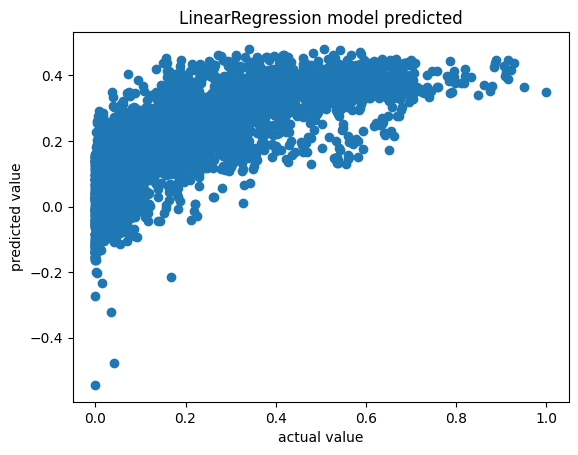

In [106]:
plt.scatter(y_test,y_pred)
plt.title("LinearRegression model predicted")
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

# conclusion

# using  LinearRegression
# R2 score on test 0.5478875350764516
# R2 score on train 0.5486163491307783


# using  polynomialRegression
# R2 score on test 0.5478875350764516
# R2 score on train 0.5486163491307783


# using  Lasso
# R2 score on test 0.5478875350764516
# R2 score on train 0.5486163491307783
# RMSE 0.12291896945338379

# using Ridge
# R2 score on test 0.5478875350764516
# R2 score on train 0.5486163491307783
# RMSE 0.12281896945338379